In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [2]:
# Variables
sRate = 20000 # sample rate in Hertz
freq1 = 50.0 # frequency of first sine wave
freq2 = 100.0 # frequency of second sine wave
amplitude1 = 10 # amplitude of first wave
amplitude2 = 5 # amplitude of second wave
numPeriods = 10 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

In [5]:
x[:10]

array([0.0000000e+00, 5.0000250e-05, 1.0000050e-04, 1.5000075e-04,
       2.0000100e-04, 2.5000125e-04, 3.0000150e-04, 3.5000175e-04,
       4.0000200e-04, 4.5000225e-04])

In [6]:
len(x)

200000

In [7]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)

In [8]:
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)

In [9]:
sampled_f1 = [f1(i) for i in x]

In [10]:
len(sampled_f1)

200000

In [11]:
sampled_f2 = [f2(i) for i in x]

In [12]:
len(sampled_f2)

200000

In [13]:
sampled_fcomb = [(f1(i)+f2(i)) for i in x]

In [14]:
len(sampled_fcomb)

200000

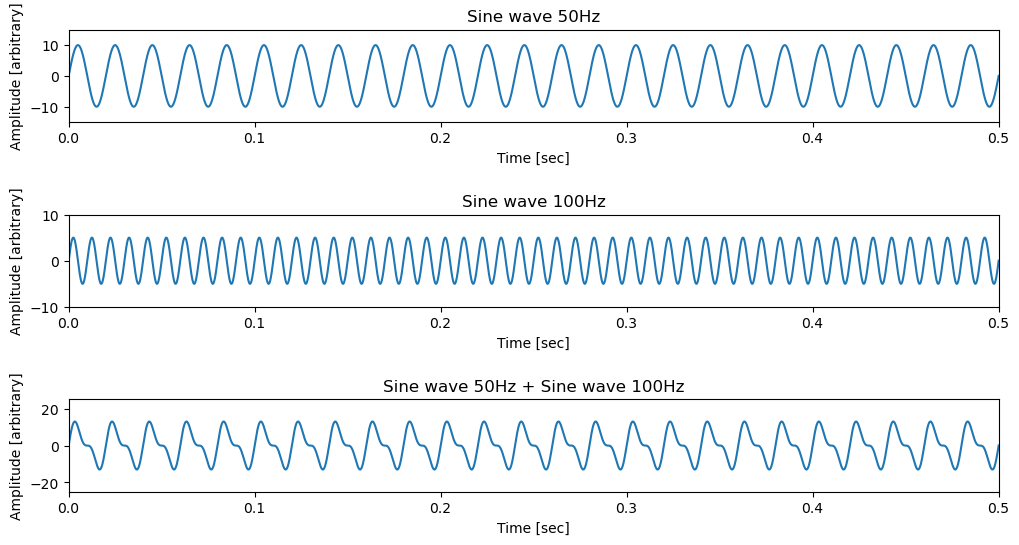

In [15]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 50Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-15, 15)

plt.subplot(312)
plt.plot(x, sampled_f2)
plt.title('Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-10, 10)

plt.subplot(313)
plt.plot(x, sampled_fcomb)
plt.title('Sine wave 50Hz + Sine wave 100Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-25, 25)
fig.savefig('../images/2_sine_waves_100_Hz_50_Hz.png', dpi=300)

In [16]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]

frequencies = np.fft.fftfreq(len(fft_output), 2/sRate)

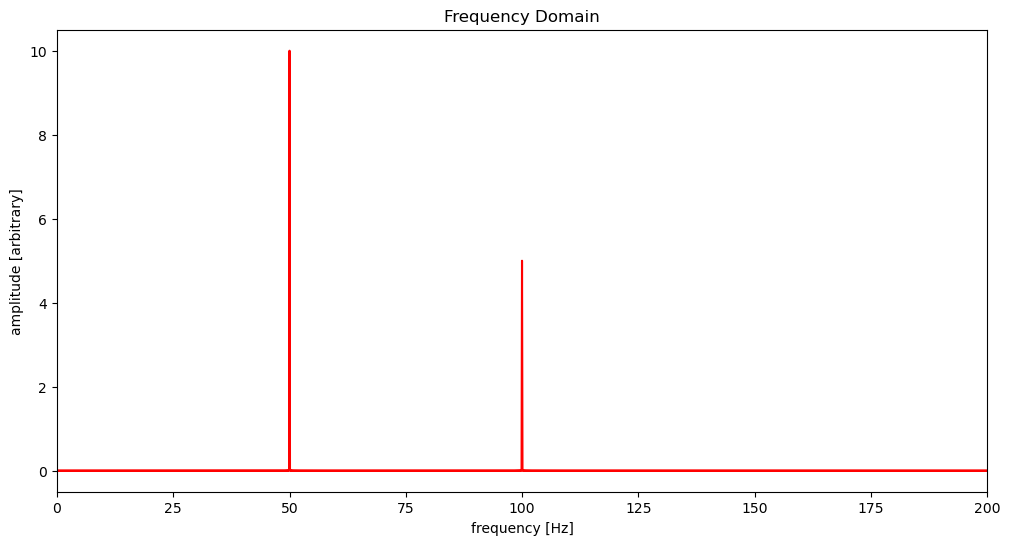

In [17]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 200)
plt.plot(frequencies, magnitude, 'r')
plt.show()


In [18]:
len(magnitude)

100001

In [19]:
len(frequencies)

100001

In [20]:
print ('Opening data files...')
dataFile = open('2sineXHz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('2sineXHz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('2sineXHz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, sampled_fcomb, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([sampled_fcomb, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...


In [21]:
import os
exec_status = os.system("./dfft 2sineXHz.dat DFFT_mag_file.dat DFFT_phase_file.dat 20000 10 > log.txt")

In [22]:
DFFT_mag_raw_data = np.loadtxt('DFFT_mag_file.dat')
DFFT_phase_raw_data = np.loadtxt('DFFT_phase_file.dat')

In [23]:
# Get the frequency bins
DFFT_freq_bins = [row[1] for row in DFFT_mag_raw_data]

In [24]:
# Get the magnitude data
DFFT_mag_data = [row[0] for row in DFFT_mag_raw_data]

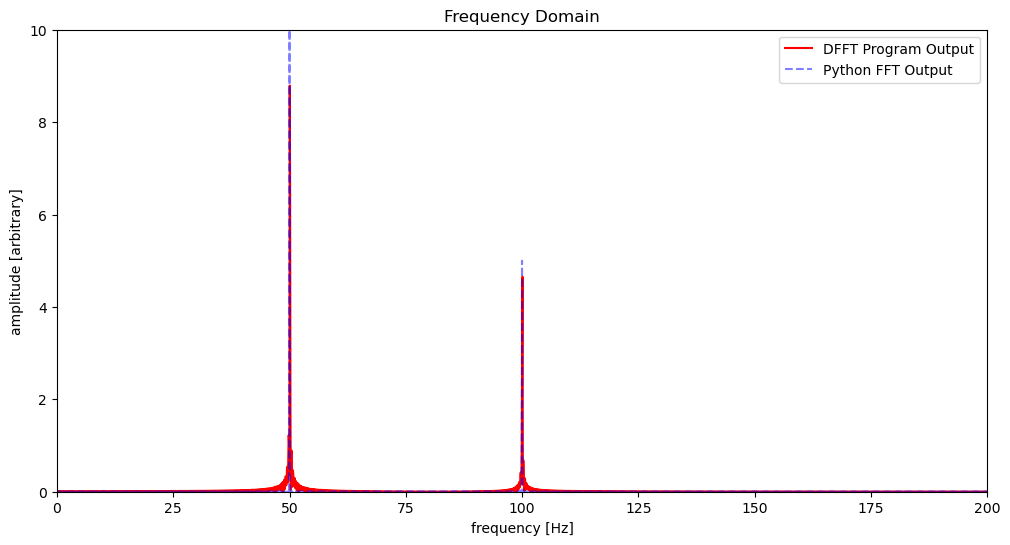

In [25]:
# Plot the magnitude data
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.plot(DFFT_freq_bins, DFFT_mag_data, 'r', label = 'DFFT Program Output')
plt.plot(frequencies, magnitude, linestyle='--', color='blue', alpha=0.5, label = 'Python FFT Output')
plt.legend()
plt.xlim(0, 200)
plt.ylim(0, 10)
plt.show()